In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

## load data from Github into new frame and remove rows with absent data ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/df-combined.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"])
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df = df.dropna()

In [2]:
## calculating returns ##

for col in df.columns[5:9]:
    df[col+'_r'] = df[col] - df[col].shift(1)
    
df = df.dropna()
print(df)

           DATE    NCF    RCF    WTI    HH    NCF_ln    RCF_ln    WTI_ln  \
4    2009-05-01  77.65  84.40  48.61  5.83  4.352212  4.435567  3.883829   
5    2009-06-01  81.25  88.50  48.56  6.10  4.397531  4.483003  3.882800   
6    2009-07-01  78.65  86.25  42.75  5.89  4.365008  4.457250  3.755369   
7    2009-08-01  79.15  84.00  41.68  5.96  4.371345  4.430817  3.730021   
8    2009-09-01  76.90  83.50  40.69  5.60  4.342506  4.424847  3.705982   
...         ...    ...    ...    ...   ...       ...       ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  3.907010  3.889777  3.765146   
4255 2020-08-26  49.70  48.95  43.21  2.52  3.906005  3.890799  3.766072   
4256 2020-08-27  49.80  48.90  42.88  2.52  3.908015  3.889777  3.758406   
4257 2020-08-28  50.60  52.20  42.96  2.46  3.923952  3.955082  3.760269   
4260 2020-08-31  51.95  52.90  42.61  2.30  3.950282  3.968403  3.752089   

         HH_ln  NCF_ln_r  RCF_ln_r  WTI_ln_r   HH_ln_r  
4     1.763017  0.043428  0.04

In [3]:
## calculating price ratios ##

df['HH_NCF'] = df['HH_ln']/df['NCF_ln']

           DATE    NCF    RCF    WTI    HH    NCF_ln    RCF_ln    WTI_ln  \
4    2009-05-01  77.65  84.40  48.61  5.83  4.352212  4.435567  3.883829   
5    2009-06-01  81.25  88.50  48.56  6.10  4.397531  4.483003  3.882800   
6    2009-07-01  78.65  86.25  42.75  5.89  4.365008  4.457250  3.755369   
7    2009-08-01  79.15  84.00  41.68  5.96  4.371345  4.430817  3.730021   
8    2009-09-01  76.90  83.50  40.69  5.60  4.342506  4.424847  3.705982   
...         ...    ...    ...    ...   ...       ...       ...       ...   
4254 2020-08-25  49.75  48.90  43.17  2.54  3.907010  3.889777  3.765146   
4255 2020-08-26  49.70  48.95  43.21  2.52  3.906005  3.890799  3.766072   
4256 2020-08-27  49.80  48.90  42.88  2.52  3.908015  3.889777  3.758406   
4257 2020-08-28  50.60  52.20  42.96  2.46  3.923952  3.955082  3.760269   
4260 2020-08-31  51.95  52.90  42.61  2.30  3.950282  3.968403  3.752089   

         HH_ln  NCF_ln_r  RCF_ln_r  WTI_ln_r   HH_ln_r    HH_NCF  
4     1.763017  0.04

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<AxesSubplot:title={'center':'Probability of being in the high regime'}>

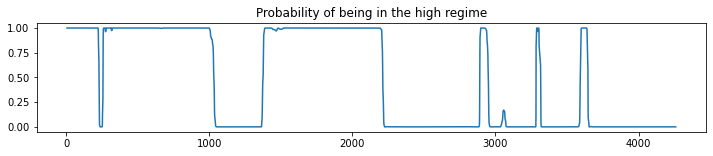

In [4]:
## markov regime switching for Henry Hub and Newcastle Gas Futures##

mod = sm.tsa.MarkovRegression(df['HH_NCF'][1:], k_regimes=2)
res = mod.fit()
res.summary()

res.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,2))

In [6]:
## OLS on volatility output ##

X = df['NCF_ln']
y = df['HH_ln']
X = sm.add_constant(X)
mod1 = sm.OLS(y,X)
results = mod1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  HH_ln   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     719.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          1.11e-141
Time:                        11:42:44   Log-Likelihood:                -158.54
No. Observations:                2900   AIC:                             321.1
Df Residuals:                    2898   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0632      0.083    -12.884      0.0

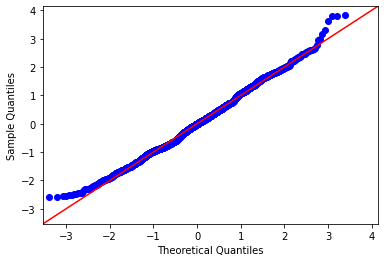

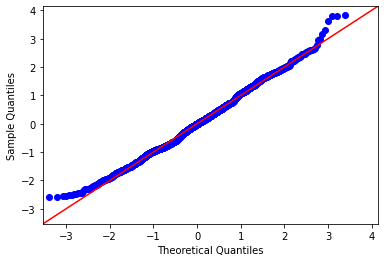

In [12]:
sm.qqplot(results.resid,line="45",fit="TRUE")